In [55]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
def carregar_csvs_de_pasta(pasta):
    all_files = []
    for root, dirs, files in os.walk(pasta):
        for file in files:
            if file.endswith(".csv"):
                all_files.append(os.path.join(root, file))
    
    df_list = []
    for file in all_files:
        try:
            df = pd.read_csv(file, sep=';', encoding='latin1')
            df_list.append(df)
        except Exception as e:
            print(f"Erro ao ler {file}: {e}")
    
    if df_list:
        return pd.concat(df_list, ignore_index=True)
    else:
        return pd.DataFrame()

In [57]:
# # Defina os caminhos das pastas contendo os CSVs KAUE
# pasta_bens = 'C:\\Projetos\\Semestre 8\\CienciaDeDados\\n2\\bem candidato\\'
# pasta_cons_cand = 'C:\\Projetos\\Semestre 8\\CienciaDeDados\\n2\\consulta candidato\\'





# Defina os caminhos das pastas contendo os CSVs Amarildo
pasta_bens = 'C:\\Users\\amjun\\Desktop\\Catolica\\CienciaDados\\N2-AnaliseDados\CSVs\\bem_candidato_2024\\'
pasta_cons_cand = 'C:\\Users\\amjun\\Desktop\\Catolica\\CienciaDados\\N2-AnaliseDados\\CSVs\\consulta_cand_2024\\'
pasta_coligacoes = 'C:\\Users\\amjun\\Desktop\\Catolica\\CienciaDados\\N2-AnaliseDados\\CSVs\\consulta_coligacao_2024\\'
pasta_redes_sociais = 'C:\\Users\\amjun\\Desktop\\Catolica\\CienciaDados\\N2-AnaliseDados\\CSVs\\rede_social_candidato_2024\\'

df_bens = carregar_csvs_de_pasta(pasta_bens)
df_candidatos = carregar_csvs_de_pasta(pasta_cons_cand)
df_coligacoes = carregar_csvs_de_pasta(pasta_coligacoes)
df_redes_sociais = carregar_csvs_de_pasta(pasta_redes_sociais)




<>:10: SyntaxWarning: invalid escape sequence '\C'
<>:10: SyntaxWarning: invalid escape sequence '\C'
C:\Users\amjun\AppData\Local\Temp\ipykernel_22036\4194016782.py:10: SyntaxWarning: invalid escape sequence '\C'
  pasta_bens = 'C:\\Users\\amjun\\Desktop\\Catolica\\CienciaDados\\N2-AnaliseDados\CSVs\\bem_candidato_2024\\'


# O candidato eleito para prefeito (2020) é o que declarou maior quantidade de bens (influência do poder econômico nas eleições)

In [58]:
# Carregar todos os CSVs das pastas
df_bens['VR_BEM_CANDIDATO'] = df_bens['VR_BEM_CANDIDATO'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)

# Filtrar prefeitos eleitos em 2024
prefeitos_2024 = df_candidatos[(df_candidatos['DS_CARGO'] == 'PREFEITO') & (df_candidatos['ANO_ELEICAO'] == 2024)]
prefeitos_eleitos_2024 = prefeitos_2024[prefeitos_2024['DS_SIT_TOT_TURNO'] == 'ELEITO']

# Mesclar as tabelas de bens e candidatos
candidatos_bens = pd.merge(prefeitos_eleitos_2024, df_bens, on='SQ_CANDIDATO')

# Converter valores dos bens em float
candidatos_bens['VR_BEM_CANDIDATO'] = candidatos_bens['VR_BEM_CANDIDATO'].replace(',', '.', regex=True).astype(float)

# Agrupar e encontrar o candidato com mais bens
candidato_com_mais_bens = candidatos_bens.groupby(['SQ_CANDIDATO', 'NM_CANDIDATO'])['VR_BEM_CANDIDATO'].sum().reset_index()
candidato_com_mais_bens = candidato_com_mais_bens.sort_values(by='VR_BEM_CANDIDATO', ascending=False)

# Exibir o candidato com maior valor de bens
candidato_elegido = candidato_com_mais_bens.head(1)

# Exibindo o insight
print(f"O candidato eleito para prefeito em 2024 que declarou a maior quantidade de bens foi {candidato_elegido['NM_CANDIDATO'].values[0]} com um total de R$ {candidato_elegido['VR_BEM_CANDIDATO'].values[0]:,.2f}.")


O candidato eleito para prefeito em 2024 que declarou a maior quantidade de bens foi MIGUEL VAZ RIBEIRO com um total de R$ 878,863,020.80.


# Qual partido tem a maior quantidade de candidatos por UF?


In [59]:
# Contar a quantidade de candidatos por partido e UF (SG_UF)
partido_uf_count = df_candidatos.groupby(['SG_UF', 'NR_PARTIDO']).size().reset_index(name='NUM_CANDIDATOS')

# Encontrar o partido com maior número de candidatos por UF
max_candidatos_por_uf = partido_uf_count.loc[partido_uf_count.groupby('SG_UF')['NUM_CANDIDATOS'].idxmax()]

df_sorted = max_candidatos_por_uf.sort_values(by='NUM_CANDIDATOS')

print(df_sorted)


    SG_UF  NR_PARTIDO  NUM_CANDIDATOS
73     AP          12             346
521    RR          10             346
1      AC          11             546
514    RO          44            1160
64     AM          44            1576
621    SE          55            1662
168    ES          40            1832
278    MS          45            1898
25     AL          15            2230
477    RN          15            2364
655    TO          10            2382
453    RJ          22            2578
302    MT          44            2932
224    MA          44            3064
380    PE          40            3208
335    PB          10            3276
142    CE          40            3466
393    PI          13            3818
312    PA          15            3924
196    GO          44            4694
575    SC          15            6172
440    PR          55            7770
118    BA          55            8750
544    RS          11            9254
255    MG          55           12584
650    SP   

# As maiores coligações (em número de partidos) foram as que mais ganharam  disputas?

In [70]:
# Filtrar apenas os eleitos (CD_SIT_TOT_TURNO == 1, 2, ou 3)
eleitos = df_candidatos[df_candidatos['CD_SIT_TOT_TURNO'].isin([1, 2, 3])]

# Contar o número de partidos por coligação (SQ_COLIGACAO)
df_candidatos['NUM_PARTIDOS_COLIGACAO'] = df_candidatos['DS_COMPOSICAO_COLIGACAO'].apply(lambda x: len(str(x).split('/')))

# Obter as coligações vencedoras
coligacoes_vencedoras = eleitos.groupby('SQ_COLIGACAO')['NUM_PARTIDOS_COLIGACAO'].first().reset_index()

# Ordenar as coligações vencedoras pelo número de partidos
coligacoes_vencedoras_sorted = coligacoes_vencedoras.sort_values(by='NUM_PARTIDOS_COLIGACAO', ascending=False)

# Contar quantas coligações venceram e qual o tamanho delas
total_vitorias_por_coligacao = eleitos.groupby('SQ_COLIGACAO').size().reset_index(name='VITORIAS')
coligacoes_com_partidos = pd.merge(coligacoes_vencedoras_sorted, total_vitorias_por_coligacao, on='SQ_COLIGACAO')

# Exibir as coligações que mais ganharam com base no número de partidos
print(coligacoes_com_partidos.sort_values(by='NUM_PARTIDOS_COLIGACAO', ascending=False))


       SQ_COLIGACAO  NUM_PARTIDOS_COLIGACAO  VITORIAS
0      130001687370                      18         4
2      250001695253                      17         4
1       60001725687                      17         4
3      250001732467                      16         4
4      130001722548                      15         4
...             ...                     ...       ...
16711  210001756762                       1         6
16710  210001756766                       1         2
16709  210001756781                       1         2
16708  210001756783                       1         6
32305  270001762065                       1         4

[32306 rows x 3 columns]



# Existe uma tendência regional para maior número de candidaturas por partido

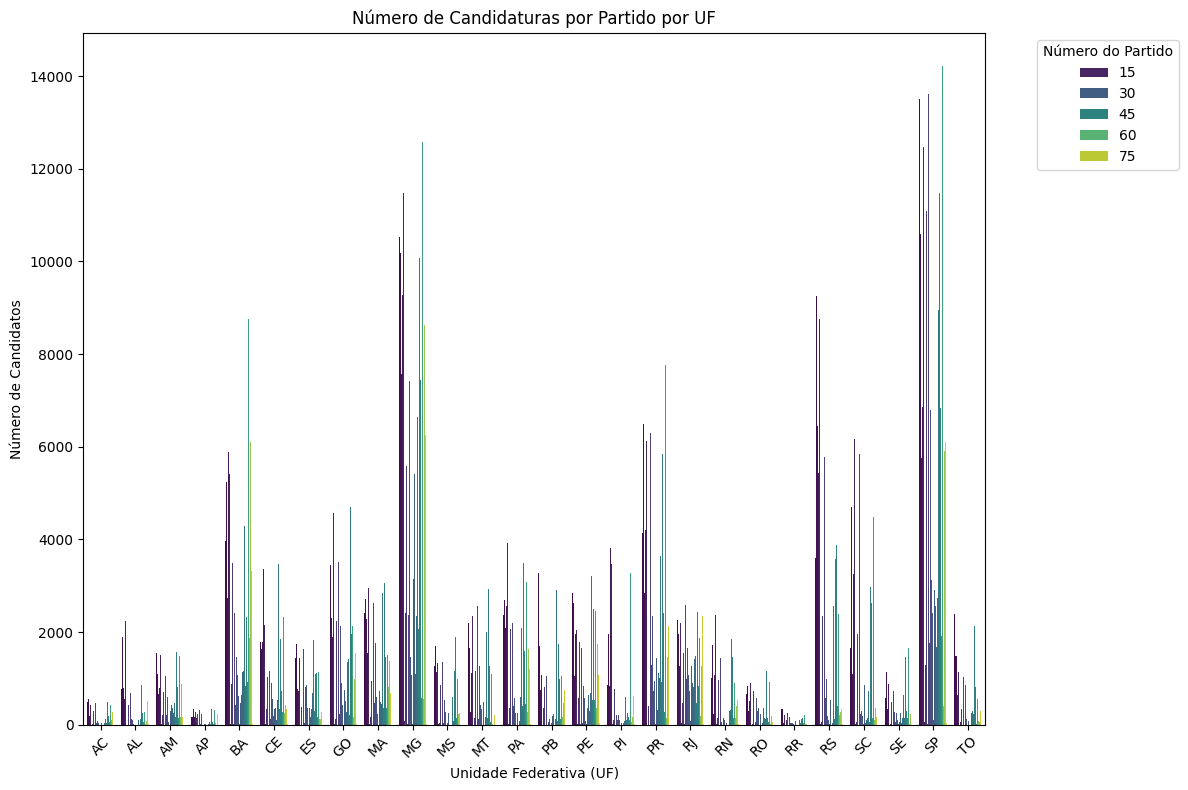

In [60]:
partido_uf_count = df_candidatos.groupby(['SG_UF', 'NR_PARTIDO']).size().reset_index(name='NUM_CANDIDATOS')

# Visualizar a tendência de candidaturas por partido
plt.figure(figsize=(12, 8))
sns.barplot(data=partido_uf_count, x='SG_UF', y='NUM_CANDIDATOS', hue='NR_PARTIDO', palette='viridis')
plt.title('Número de Candidaturas por Partido por UF')
plt.xlabel('Unidade Federativa (UF)')
plt.ylabel('Número de Candidatos')
plt.xticks(rotation=45)
plt.legend(title='Número do Partido', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Qual a região que mais registrou candidatos Indígenas e Quilombolas?

In [61]:
candidatos_indigenas = df_candidatos[df_candidatos['CD_COR_RACA'] == 5]

# Mapear UFs para regiões
candidatos_indigenas['REGIAO'] = candidatos_indigenas['SG_UF']

# Contar o número de candidatos por região
candidatos_por_regiao = candidatos_indigenas.groupby('REGIAO').size().reset_index(name='NUM_CANDIDATOS')

# Identificar a região com mais candidatos
regiao_max_candidatos = candidatos_por_regiao.loc[candidatos_por_regiao['NUM_CANDIDATOS'].idxmax()]

# Exibir o resultado
print(regiao_max_candidatos)

REGIAO              AM
NUM_CANDIDATOS    1144
Name: 2, dtype: object


C:\Users\amjun\AppData\Local\Temp\ipykernel_22036\3228461563.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidatos_indigenas['REGIAO'] = candidatos_indigenas['SG_UF']


# Qual a rede social preferida dos candidatos? Separe por partido e por UF.

In [65]:
def identificar_rede_social(url):
    if 'facebook.com' in url:
        return 'Facebook'
    elif 'instagram.com' in url:
        return 'Instagram'
    elif 'x.com' in url:
        return 'X'
    elif 'twitter.com' in url:
        return 'X'
    elif 'youtube.com' in url:
        return 'YouTube'
    elif 'linkedin.com' in url:
        return 'LinkedIn'
    else:
        return 'Outros'


# Aplicar a função no campo DS_URL
df_redes_sociais['DS_REDE_SOCIAL'] = df_redes_sociais['DS_URL'].apply(identificar_rede_social)

# Filtrar apenas as redes sociais com ordem 1 (NR_ORDEM_REDE_SOCIAL == 1)
df_redes_sociais_favorita = df_redes_sociais[df_redes_sociais['NR_ORDEM_REDE_SOCIAL'] == 1]

# Mesclar os datasets pela chave 'SQ_CANDIDATO'
df_merged = pd.merge(df_candidatos, df_redes_sociais_favorita, on='SQ_CANDIDATO', how='inner')

# Contar a rede social mais usada por partido e UF
rede_social_partido_uf = df_merged.groupby(['SG_UF_x', 'NR_PARTIDO', 'DS_REDE_SOCIAL']).size().reset_index(name='NUM_CANDIDATOS')

# Encontrar a rede social mais usada por partido e UF
rede_social_preferida = rede_social_partido_uf.loc[rede_social_partido_uf.groupby(['SG_UF_x', 'NR_PARTIDO'])['NUM_CANDIDATOS'].idxmax()]

# Exibir o resultado
print(rede_social_preferida)

     SG_UF_x  NR_PARTIDO DS_REDE_SOCIAL  NUM_CANDIDATOS
1         AC          10      Instagram              16
4         AC          11      Instagram              36
5         AC          12      Instagram              20
7         AC          13       Facebook              12
11        AC          15      Instagram              16
...      ...         ...            ...             ...
2020      TO          50      Instagram              24
2022      TO          55      Instagram             184
2025      TO          65      Instagram              28
2027      TO          70      Instagram              36
2030      TO          77      Instagram              72

[635 rows x 4 columns]
